In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [8]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
gdf = pd.read_csv('regssdatacsv.csv')

In [10]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [11]:
LACdf = gdf[gdf.Tm == 'LAC']
DALdf = gdf[gdf.Tm == 'DAL']


In [12]:
LACdf.Date = LACdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
LACdf = LACdf[(LACdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (LACdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

DALdf.Date = DALdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
DALdf = DALdf[(DALdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (DALdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

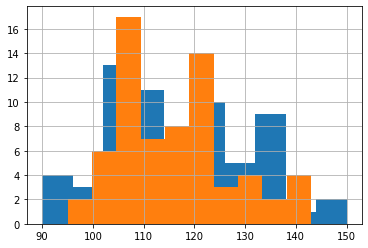

In [15]:
LACdf.TeamPTS.hist()
DALdf.TeamPTS.hist()

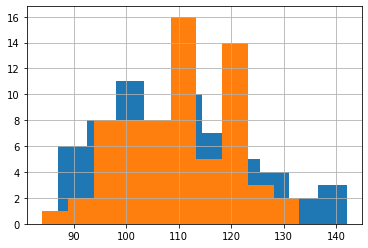

In [14]:
LACdf.OpponentPTS.hist()
DALdf.OpponentPTS.hist()

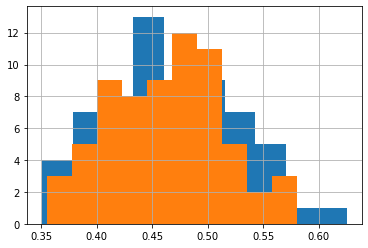

In [13]:
LACdf.TeamFGP.hist()
DALdf.TeamFGP.hist()

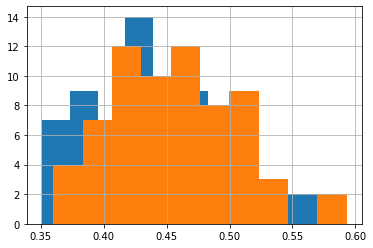

In [17]:
LACdf.OpponentFGP.hist()
DALdf.OpponentFGP.hist()

In [16]:
LACmeanpts = LACdf.TeamPTS.mean()
DALmeanpts = DALdf.TeamPTS.mean()
LACfgp = LACdf.TeamFGP.mean()
DALfgp = DALdf.TeamFGP.mean()
LACsdpts = LACdf.TeamPTS.std()
DALsdpts = DALdf.TeamPTS.std()

LACmeaDALp = LACdf.OpponentPTS.mean()
DALmeaDALp = DALdf.OpponentPTS.mean()
LACfgpopp = LACdf.OpponentFGP.mean()
DALfgpopp = DALdf.OpponentFGP.mean()
LACsdopp = LACdf.OpponentPTS.std()
DALsdopp = DALdf.OpponentPTS.std()

print("LAC Mean ", LACmeanpts)
print("LAC FG% ", LACfgp)
print("LAC Points Standard Deviation ", LACsdpts)
print("DAL Points Mean ", DALmeanpts)
print("DAL FG% ", DALfgp)
print("DAL Points Standard Deviation ", DALsdpts)

print("LAC OppPoints Mean ", LACmeaDALp)
print("LAC OppFG% Mean ", LACfgpopp)
print("LAC OppPoints SD ", LACsdopp)
print("DAL OppPoints Mean ", DALmeaDALp)
print("DAL OppFG% Mean ", DALfgpopp)
print("DAL OppPoints SD ", DALsdopp)

LAC Mean  116.1875
LAC FG%  0.46528125000000015
LAC Points Standard Deviation  14.054175225527867
DAL Points Mean  116.35820895522389
DAL FG%  0.4626567164179105
DAL Points Standard Deviation  11.21511627702501
LAC OppPoints Mean  109.671875
LAC OppFG% Mean  0.4372500000000002
LAC OppPoints SD  13.727570089260354
DAL OppPoints Mean  110.31343283582089
DAL OppFG% Mean  0.45571641791044765
DAL OppPoints SD  10.53883001272377


In [18]:
def gameSim():
    LACScore = (rnd.gauss(LACmeanpts,LACsdpts)+ rnd.gauss(DALmeaDALp,DALsdopp))/2
    DALScore = (rnd.gauss(DALmeanpts,DALsdpts)+ rnd.gauss(DALmeaDALp,DALsdopp))/2
    if int(round(LACScore)) > int(round(DALScore)):
        return 1
    elif int(round(LACScore)) < int(round(DALScore)):
        return -1
    else: return 0

In [19]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('LAC Win ', team1win/(team1win+team2win),'%')
    print('DAL Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [20]:
gAmesSim(10000)

LAC Win  0.507703443284045 %
DAL Win  0.4922965567159549 %


[-1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,